# Looking at the MVP on real data!

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from autoportfolio.optimize import minimum_volatility

## Variance covariance matrix
Let's visualize the data

In [14]:
df = pd.read_csv("data.csv")
display(df)

,date,asset1,asset2,asset3,asset4,asset5,asset6,asset7,asset8,asset9,bm
0,7/1/14,0.009828,0.010950,0.007860,0.006861,0.012071,0.005379,0.006951,0.008505,0.004621,0.007271
1,7/2/14,-0.006432,-0.005319,-0.002411,0.000716,-0.004207,-0.000442,0.000003,0.000440,-0.003430,-0.000426
2,7/3/14,0.006927,0.007224,0.006835,0.005482,0.007520,0.005212,0.005309,0.005403,0.003624,0.005462
3,7/7/14,-0.014215,-0.017710,-0.009531,NaN,-0.021196,-0.004354,NaN,-0.005104,-0.006003,-0.005773
4,7/8/14,-0.007268,-0.012266,-0.010790,-0.006756,-0.017290,-0.005469,-0.007320,-0.009141,-0.004766,-0.007711
...,...,...,...,...,...,...,...,...,...,...,...
1274,7/25/19,-0.011487,-0.011990,-0.008196,-0.005258,-0.012472,-0.004391,-0.005681,-0.006917,-0.006845,-0.006101
1275,7/26/19,0.010432,0.011275,0.010268,0.007400,0.012085,0.005129,0.007656,0.010085,0.005201,0.007896
1276,7/29/19,-0.006003,-0.006278,-0.005003,-0.001612,-0.006541,-0.001210,-0.002081,-0.002914,NaN,-0.002359
1277,7/30/19,0.011833,0.010609,-0.001700,-0.002478,0.009438,-0.000559,-0.001984,-0.003350,0.003392,-0.001153


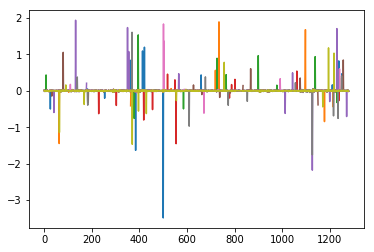

In [10]:
for i in range(1, 10):
    plt.plot(range(len(df["date"])), df[f"asset{i}"])
plt.show()

Take advantage of pandas covariance calculator which esitmates missing values in the raw data. 

,asset1,asset2,asset3,asset4,asset5,asset6,asset7,asset8,asset9
asset1,0.015854,0.000336,0.000255,0.000022,0.000348,0.000217,0.000230,0.000192,0.000297
asset2,0.000336,0.008892,0.000200,0.000172,0.000288,0.000148,0.000180,0.000301,0.000211
asset3,0.000255,0.000200,0.005183,0.000154,0.000253,0.000132,0.000140,0.000205,0.000197
asset4,0.000022,0.000172,0.000154,0.003614,0.000218,0.000118,0.000163,0.000168,0.000152
asset5,0.000348,0.000288,0.000253,0.000218,0.014174,0.000188,0.000226,0.003401,0.000262
asset6,0.000217,0.000148,0.000132,0.000118,0.000188,0.002246,0.000131,0.000138,0.000147
asset7,0.000230,0.000180,0.000140,0.000163,0.000226,0.000131,0.005001,0.000188,0.000190
asset8,0.000192,0.000301,0.000205,0.000168,0.003401,0.000138,0.000188,0.007043,0.000174
asset9,0.000297,0.000211,0.000197,0.000152,0.000262,0.000147,0.000190,0.000174,0.006250


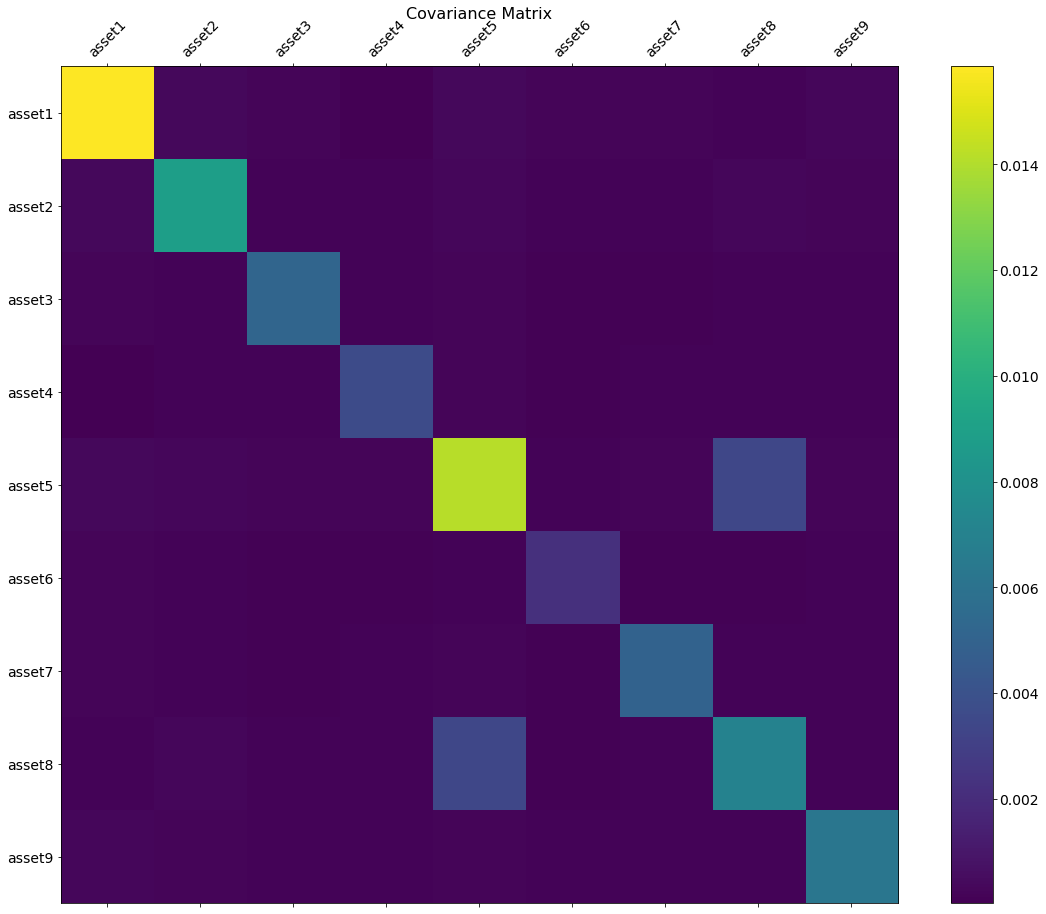

In [80]:
cov_mat = df.drop(columns="bm").cov()
display(cov_mat)

f = plt.figure(figsize=(19, 15))
plt.matshow(cov_mat, fignum=f.number)
plt.xticks(range(cov_mat.shape[1]), cov_mat.columns, fontsize=14, rotation=45)
plt.yticks(range(cov_mat.shape[1]), cov_mat.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Covariance Matrix', fontsize=16);

## MVP
Now, let's calculate the mvp using the function we defined earlier.

In [84]:
mvp = minimum_volatility(cov_mat, w_lower=0.0, w_upper=0.15, convex=False)
display(mvp.tolist())

[0.048705206461900304,
 0.08969384647601915,
 0.15,
 0.15,
 0.03028952404674494,
 0.15,
 0.15,
 0.1004512279231265,
 0.13086019509220925]